[Credit ScoreCard example](https://www.kaggle.com/code/orange90/credit-scorecard-example/notebook)


https://blog.csdn.net/weixin_41065383/article/details/89419167
基于sklearn决策树的最优分箱与IV值计算-Python实现 https://zhuanlan.zhihu.com/p/58824825


| Variable  Name                       | Type       | desc                                                         |
| ------------------------------------ | ---------- | ------------------------------------------------------------ |
| SeriousDlqin2yrs                     | Y/N        | 用户在 90 天后因拖欠或更严重情况                             |
| RevolvingUtilizationOfUnsecuredLines | percentage | 信用卡和个人信用贷款的总余额（房地产除外）和汽车贷款等分期付款债务除以信用额度之和 |
| age                                  | integer    |                                                              |
| NumberOfTime30-59DaysPastDueNotWorse | integer    | 借款人逾期30-59天的次数，但在过去2年中没有更糟。             |
| DebtRatio                            | percentage | 每月债务支付，赡养费，生活费用除以每月总收入                 |
| MonthlyIncome                        | real       | 月收入                                                       |
| NumberOfOpenCreditLinesAndLoans      | integer    | 未结贷款（如汽车贷款或抵押贷款等分期付款）和信用额度（例如信用卡）的数量 |
| NumberOfTimes90DaysLate              | integer    | 借款人逾期90天或更长时间的次数。                             |
| NumberRealEstateLoansOrLines         | integer    | 房屋贷款和房地产贷款（包括房屋净值信贷额度）的数量           |
| NumberOfTime60-89DaysPastDueNotWorse | integer    | 借款人逾期60-89天的次数，但在过去2年中没有更糟。             |
| NumberOfDependents                   | integer    | 家庭中不包括自己的受抚养人（配偶，子女等）的数量             |


In [2]:

## 导入包

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os

for dirname, _, filenames in os.walk('../data/givemesomecredit/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

../data/givemesomecredit/sampleEntry.csv
../data/givemesomecredit/cs-test.csv
../data/givemesomecredit/Data Dictionary.xls
../data/givemesomecredit/cs-training.csv


In [3]:
df_train = pd.read_csv("../data/givemesomecredit/cs-training.csv")
df_test = pd.read_csv("../data/givemesomecredit/cs-test.csv")
df_train.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [4]:
df_train.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


## 数据分箱
需要 qcut的:

RevolvingUtilizationOfUnsecuredLines
DebtRatio
MonthlyIncome
NumberOfOpenCreditLinesAndLoans
NumberRealEstateLoansOrLines

需要 cut的:
age
NumberOfDependents
NumberOfTime30-59DaysPastDueNotWorse
NumberOfTimes90DaysLate
NumberOfTime60-89DaysPastDueNotWorse


In [5]:
df_train = df_train.fillna(df_train.median())
print(df_train.isnull().sum())

Unnamed: 0                              0
SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64


In [8]:
age_bins = [-math.inf, 25, 40, 50, 60, 70, math.inf]
df_train['bin_age'] = pd.cut(df_train['age'],bins=age_bins).astype(str)
dependent_bin = [-math.inf,2,4,6,8,10,math.inf]
df_train['bin_NumberOfDependents'] = pd.cut(df_train['NumberOfDependents'],bins=dependent_bin).astype(str)
dpd_bins = [-math.inf,1,2,3,4,5,6,7,8,9,math.inf]
df_train['bin_NumberOfTimes90DaysLate'] = pd.cut(df_train['NumberOfTimes90DaysLate'],bins=dpd_bins)
df_train['bin_NumberOfTime30-59DaysPastDueNotWorse'] = pd.cut(df_train['NumberOfTime30-59DaysPastDueNotWorse'], bins=dpd_bins)
df_train['bin_NumberOfTime60-89DaysPastDueNotWorse'] = pd.cut(df_train['NumberOfTime60-89DaysPastDueNotWorse'], bins=dpd_bins)


df_train['bin_RevolvingUtilizationOfUnsecuredLines'] = pd.qcut(df_train['RevolvingUtilizationOfUnsecuredLines'],q=5,duplicates='drop').astype(str)
df_train['bin_DebtRatio'] = pd.qcut(df_train['DebtRatio'],q=5,duplicates='drop').astype(str)
df_train['bin_MonthlyIncome'] = pd.qcut(df_train['MonthlyIncome'],q=5,duplicates='drop').astype(str)
df_train['bin_NumberOfOpenCreditLinesAndLoans'] = pd.qcut(df_train['NumberOfOpenCreditLinesAndLoans'],q=5,duplicates='drop').astype(str)
df_train['bin_NumberRealEstateLoansOrLines'] = pd.qcut(df_train['NumberRealEstateLoansOrLines'],q=5,duplicates='drop').astype(str)


## 特征筛选

In [12]:
def cal_IV(df, feature, target):
    lst = []
    cols=['Variable', 'Value', 'All', 'Bad']
    for i in range(df[feature].nunique()):

        val = list(df[feature].unique())[i]
        lst.append([feature, val, df[df[feature] == val].count()[feature], df[(df[feature] == val) & (df[target] == 1)].count()[feature]])
#     print(lst)
    data = pd.DataFrame(lst, columns=cols)
    data = data[data['Bad'] > 0]

    data['Share'] = data['All'] / data['All'].sum()
    data['Bad Rate'] = data['Bad'] / data['All']
    data['Distribution Good'] = (data['All'] - data['Bad']) / (data['All'].sum() - data['Bad'].sum())
    data['Distribution Bad'] = data['Bad'] / data['Bad'].sum()
    data['WoE'] = np.log(data['Distribution Bad'] / data['Distribution Good'])
    data['IV'] = (data['WoE'] * (data['Distribution Bad'] - data['Distribution Good'])).sum()

    data = data.sort_values(by=['Variable', 'Value'], ascending=True)

    return data['IV'].values[0]

In [16]:
bin_cols = [c for c in df_train.columns.values if c.startswith('bin_')]


for f in bin_cols:
    print(f)
    print(cal_IV(df_train,f,'SeriousDlqin2yrs'))

bin_age
0.24041120302785982
bin_NumberOfDependents
0.01450836007644442
bin_NumberOfTimes90DaysLate
0.49160685733515563
bin_NumberOfTime30-59DaysPastDueNotWorse
0.492444774570198
bin_NumberOfTime60-89DaysPastDueNotWorse
0.2665587583516951
bin_RevolvingUtilizationOfUnsecuredLines
1.0596188771423887
bin_DebtRatio
0.05948761145809681
bin_MonthlyIncome
0.05623446147714756
bin_NumberOfOpenCreditLinesAndLoans
0.04802315528985505
bin_NumberRealEstateLoansOrLines
0.0120914141106244


只选择IV>0.1的，入选的有五个变量：
* bin_RevolvingUtilizationOfUnsecuredLines
* bin_NumberOfTime30-59DaysPastDueNotWorse
* bin_age
* bin_NumberOfTimes90DaysLate
* bin_NumberOfTime60-89DaysPastDueNotWorse

In [19]:
def cal_WOE(df,features,target):
    df_new = df
    for f in features:
        df_woe = df_new.groupby(f).agg({target:['sum','count']})
        df_woe.columns = list(map(''.join, df_woe.columns.values))
        df_woe = df_woe.reset_index()
        df_woe = df_woe.rename(columns = {target+'sum':'bad'})
        df_woe = df_woe.rename(columns = {target+'count':'all'})
        df_woe['good'] = df_woe['all']-df_woe['bad']
        df_woe = df_woe[[f,'good','bad']]
        df_woe['bad_rate'] = df_woe['bad'].mask(df_woe['bad']==0, 1)/df_woe['bad'].sum() # mask 0 to 1 to avoid log(0)
        df_woe['good_rate'] = df_woe['good']/df_woe['good'].sum()

        df_woe['woe'] = np.log(df_woe['bad_rate'].divide(df_woe['good_rate'],fill_value=1))
        df_woe.columns = [c if c==f else c+'_'+f for c in list(df_woe.columns.values)]
        df_new = df_new.merge(df_woe,on=f,how='left')
    return df_new

In [22]:
# 我们根据IV选出来的特征
feature_cols = ['RevolvingUtilizationOfUnsecuredLines','NumberOfTime30-59DaysPastDueNotWorse','age','NumberOfTimes90DaysLate','NumberOfTime60-89DaysPastDueNotWorse']
bin_cols = ['bin_RevolvingUtilizationOfUnsecuredLines','bin_NumberOfTime30-59DaysPastDueNotWorse','bin_age','bin_NumberOfTimes90DaysLate','bin_NumberOfTime60-89DaysPastDueNotWorse']
df_woe = cal_WOE(df_train,bin_cols,'SeriousDlqin2yrs')
woe_cols = [c for c in list(df_woe.columns.values) if 'woe' in c]
df_woe[woe_cols]

,woe_bin_RevolvingUtilizationOfUnsecuredLines,woe_bin_NumberOfTime30-59DaysPastDueNotWorse,woe_bin_age,woe_bin_NumberOfTimes90DaysLate,woe_bin_NumberOfTime60-89DaysPastDueNotWorse
0,1.242254,1.616726,0.228343,-0.176674,-0.09799
1,1.242254,-0.257826,0.469547,-0.176674,-0.09799
2,0.053164,-0.257826,0.469547,-0.176674,-0.09799
3,-0.866502,-0.257826,0.469547,-0.176674,-0.09799
4,1.242254,-0.257826,0.228343,-0.176674,-0.09799
...,...,...,...,...,...
149995,-1.447382,-0.257826,-1.132145,-0.176674,-0.09799
149996,0.053164,-0.257826,0.228343,-0.176674,-0.09799
149997,-0.866502,-0.257826,-0.084782,-0.176674,-0.09799
149998,-1.286617,-0.257826,0.469547,-0.176674,-0.09799


In [23]:
df_bin_to_woe = pd.DataFrame(columns = ['features','bin','woe'])
for f in feature_cols:
    b = 'bin_'+f
    w = 'woe_bin_'+f
    df = df_woe[[w,b]].drop_duplicates()
    df.columns = ['woe','bin']
    df['features'] = f
    df=df[['features','bin','woe']]
    df_bin_to_woe = pd.concat([df_bin_to_woe,df])
df_bin_to_woe

,features,bin,woe
0,RevolvingUtilizationOfUnsecuredLines,"(0.699, 50708.0]",1.242254
2,RevolvingUtilizationOfUnsecuredLines,"(0.271, 0.699]",0.053164
3,RevolvingUtilizationOfUnsecuredLines,"(0.0832, 0.271]",-0.866502
11,RevolvingUtilizationOfUnsecuredLines,"(-0.001, 0.0192]",-1.286617
14,RevolvingUtilizationOfUnsecuredLines,"(0.0192, 0.0832]",-1.447382
0,NumberOfTime30-59DaysPastDueNotWorse,"(1.0, 2.0]",1.616726
1,NumberOfTime30-59DaysPastDueNotWorse,"(-inf, 1.0]",-0.257826
13,NumberOfTime30-59DaysPastDueNotWorse,"(2.0, 3.0]",2.027495
183,NumberOfTime30-59DaysPastDueNotWorse,"(3.0, 4.0]",2.336869
191,NumberOfTime30-59DaysPastDueNotWorse,"(4.0, 5.0]",2.436786


## 逻辑回归建模 ¶
留30%作为模型的验证集

In [24]:
X_train, X_test, y_train, y_test = train_test_split(df_woe[woe_cols], df_woe['SeriousDlqin2yrs'], test_size=0.2, random_state=42)

In [25]:
print('bad rate is: ',y_train.mean())

bad rate is:  0.06725


In [26]:
X_train.describe()

,woe_bin_RevolvingUtilizationOfUnsecuredLines,woe_bin_NumberOfTime30-59DaysPastDueNotWorse,woe_bin_age,woe_bin_NumberOfTimes90DaysLate,woe_bin_NumberOfTime60-89DaysPastDueNotWorse
count,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000
mean,-0.460494,-0.143652,-0.112757,-0.114278,-0.062802
std,0.998029,0.487847,0.539645,0.432243,0.315584
min,-1.447382,-0.257826,-1.132145,-0.176674,-0.097990
25%,-1.286617,-0.257826,-0.689003,-0.176674,-0.097990
50%,-0.866502,-0.257826,-0.084782,-0.176674,-0.097990
75%,0.053164,-0.257826,0.228343,-0.176674,-0.097990
max,1.242254,2.846431,0.562024,4.124352,3.734887


In [27]:
model = LogisticRegression(random_state=42).fit(X_train,y_train)

In [28]:
#在验证集上看性能
model.score(X_test,y_test)

0.9370333333333334

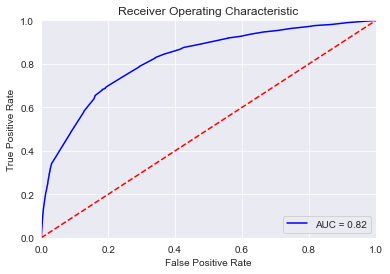

In [29]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = model.predict_proba(X_test)

preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [30]:
#混淆矩阵
y_pred = model.predict(X_test)
metrics.confusion_matrix(y_test,y_pred)

array([[27888,   156],
       [ 1733,   223]])

In [31]:
model.coef_

array([[0.76447128, 0.59842898, 0.48418264, 0.5744202 , 0.32056187]])

## 评分卡转换 ¶

In [32]:
A = 650
B =72.13

In [33]:
def generate_scorecard(model_coef,binning_df,features,B):
    lst = []
    cols = ['Variable','Binning','Score']
    coef = model_coef[0]
    for i in range(len(features)):
        f = features[i]
        df = binning_df[binning_df['features']==f]
        for index,row in df.iterrows():
            lst.append([f,row['bin'],int(round(-coef[i]*row['woe']*B))])
    data = pd.DataFrame(lst, columns=cols)
    return data


In [34]:
score_card = generate_scorecard(model.coef_,df_bin_to_woe,feature_cols,B)
score_card

,Variable,Binning,Score
0,RevolvingUtilizationOfUnsecuredLines,"(0.699, 50708.0]",-68
1,RevolvingUtilizationOfUnsecuredLines,"(0.271, 0.699]",-3
2,RevolvingUtilizationOfUnsecuredLines,"(0.0832, 0.271]",48
3,RevolvingUtilizationOfUnsecuredLines,"(-0.001, 0.0192]",71
4,RevolvingUtilizationOfUnsecuredLines,"(0.0192, 0.0832]",80
5,NumberOfTime30-59DaysPastDueNotWorse,"(1.0, 2.0]",-70
6,NumberOfTime30-59DaysPastDueNotWorse,"(-inf, 1.0]",11
7,NumberOfTime30-59DaysPastDueNotWorse,"(2.0, 3.0]",-88
8,NumberOfTime30-59DaysPastDueNotWorse,"(3.0, 4.0]",-101
9,NumberOfTime30-59DaysPastDueNotWorse,"(4.0, 5.0]",-105


In [35]:
sort_scorecard = score_card.groupby('Variable').apply(lambda x: x.sort_values('Score', ascending=False))
sort_scorecard

Variable  \
Variable                                                                        
NumberOfTime30-59DaysPastDueNotWorse 6   NumberOfTime30-59DaysPastDueNotWorse   
                                     5   NumberOfTime30-59DaysPastDueNotWorse   
                                     13  NumberOfTime30-59DaysPastDueNotWorse   
                                     14  NumberOfTime30-59DaysPastDueNotWorse   
                                     7   NumberOfTime30-59DaysPastDueNotWorse   
                                     8   NumberOfTime30-59DaysPastDueNotWorse   
                                     9   NumberOfTime30-59DaysPastDueNotWorse   
                                     10  NumberOfTime30-59DaysPastDueNotWorse   
                                     12  NumberOfTime30-59DaysPastDueNotWorse   
                                     11  NumberOfTime30-59DaysPastDueNotWorse   
NumberOfTime60-89DaysPastDueNotWorse 31  NumberOfTime60-89DaysPastDueNotWorse   
                                     32  NumberOfTime60-89DaysPastDueNotWorse   
                                     39  NumberOfTime60-89DaysPastDueNotWorse   
                                     40  NumberOfTime60-89DaysPastDueNotWorse   
                                     35  NumberOfTime60-89DaysPastDueNotWorse   
                                     38  NumberOfTime60-89DaysPastDueNotWorse   
                                     34  NumberOfTime60-89DaysPastDueNotWorse   
                                     33  NumberOfTime60-89DaysPastDueNotWorse   
                                     36  NumberOfTime60-89DaysPastDueNotWorse   
                                     37  NumberOfTime60-89DaysPastDueNotWorse   
NumberOfTimes90DaysLate              21               NumberOfTimes90DaysLate   
                                     23               NumberOfTimes90DaysLate   
                                     26               NumberOfTimes90DaysLate   
                                     22               NumberOfTimes90DaysLate   
                                     28               NumberOfTimes90DaysLate   
                                     24               NumberOfTimes90DaysLate   
                                     25               NumberOfTimes90DaysLate   
                                     30               NumberOfTimes90DaysLate   
                                     27               NumberOfTimes90DaysLate   
                                     29               NumberOfTimes90DaysLate   
RevolvingUtilizationOfUnsecuredLines 4   RevolvingUtilizationOfUnsecuredLines   
                                     3   RevolvingUtilizationOfUnsecuredLines   
                                     2   RevolvingUtilizationOfUnsecuredLines   
                                     1   RevolvingUtilizationOfUnsecuredLines   
                                     0   RevolvingUtilizationOfUnsecuredLines   
age                                  17                                   age   
                                     19                                   age   
                                     18                                   age   
                                     15                                   age   
                                     16                                   age   
                                     20                                   age   

                                                  Binning  Score  
Variable                                                          
NumberOfTime30-59DaysPastDueNotWorse 6        (-inf, 1.0]     11  
                                     5         (1.0, 2.0]    -70  
                                     13        (7.0, 8.0]    -81  
                                     14        (8.0, 9.0]    -84  
                                     7         (2.0, 3.0]    -88  
                                     8         (3.0, 4.0]   -101  
                                     9         (4

In [ ]:
dsddddDDD